In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#!unzip -q -u "/content/drive/My Drive/celeba/CelebAMask-HQ.zip" -d "/content/drive/My Drive/celeba/CelebAMask-HQ"

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
import os

file_path = '/content/drive/My Drive/celeba/CelebAMask-HQ/CelebAMask-HQ/new_celeba_captions.csv'
df = pd.read_csv(file_path)

print(df.head())

      ID                                          caption_0  \
0  0.jpg  This person is smiling and has pointy nose, wa...   
1  1.jpg  The person looks smiling, attractive. This per...   
2  2.jpg  The woman looks smiling, attractive, young and...   
3  3.jpg  This is a young, attractive, smiling person. T...   
4  4.jpg  The woman is young and is with big lips, brown...   

                                           caption_1  \
0  The person looks smiling, attractive and is wi...   
1  This is a young, smiling person. This person h...   
2  This person looks attractive, young, smiling. ...   
3  This is a attractive person. This woman is wit...   
4  This person appears to be young. The woman has...   

                                           caption_2  \
0  This woman is smiling and has bags under eyes,...   
1  This is a attractive, smiling, young person. S...   
2  This is a smiling, young, attractive person. T...   
3  This woman is young, attractive. The person ha...   
4  T

In [4]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             30000 non-null  object
 1   caption_0      30000 non-null  object
 2   caption_1      30000 non-null  object
 3   caption_2      30000 non-null  object
 4   caption_3      30000 non-null  object
 5   caption_4      30000 non-null  object
 6   caption_5      30000 non-null  object
 7   caption_6      30000 non-null  object
 8   caption_7      30000 non-null  object
 9   caption_8      30000 non-null  object
 10  caption_9      30000 non-null  object
 11  blip2_caption  30000 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB
None
ID               0
caption_0        0
caption_1        0
caption_2        0
caption_3        0
caption_4        0
caption_5        0
caption_6        0
caption_7        0
caption_8        0
caption_9        0
blip2_caption    0
dtype: int64


In [10]:
description_columns = [f'caption_{i}' for i in range(0, 10)]
description_columns.append('blip2_caption')

df['combined_captions'] = df[description_columns].apply(lambda x: ' '.join(x.dropna()), axis=1)

In [29]:
df['combined_captions'][0]

'This person is smiling and has pointy nose, wavy hair, arched eyebrows, high cheekbones, bushy eyebrows, mouth slightly open. She wears heavy makeup, lipstick. The person looks smiling, attractive and is with bushy eyebrows, high cheekbones, mouth slightly open, brown hair, wavy hair. This person wears lipstick, heavy makeup. This woman is smiling and has bags under eyes, wavy hair. This person wears heavy makeup, lipstick. This woman looks young and is with bags under eyes, mouth slightly open, wavy hair, bushy eyebrows, arched eyebrows, pointy nose, high cheekbones. This person wears heavy makeup, lipstick. The woman is young, attractive, smiling and is with arched eyebrows, brown hair. She is wearing lipstick. She appears to be attractive, smiling, young. This woman has brown hair, arched eyebrows, mouth slightly open, pointy nose and wears heavy makeup, lipstick. This person looks smiling, attractive, young. She is with arched eyebrows, wavy hair and wears lipstick. She appears to

In [26]:
import pandas as pd
import re

def remove_repeated_phrases(text):
    # This regex finds phrases that are repeated consecutively
    cleaned_text = re.sub(r'/(\b\S+\b)\s+\b\1\b/', r'\1', text)
    # Remove any remaining duplicates in the text
    words = cleaned_text.split()
    unique_words = list(dict.fromkeys(words))
    return ' '.join(unique_words)

df['cleaned_blip2_caption'] = df['blip2_caption'].apply(remove_repeated_phrases)

print(df[['blip2_caption', 'cleaned_blip2_caption']])

                                           blip2_caption  \
0      miss usa 2012, miss usa 2012, miss usa 2012, m...   
1                 a beautiful blond woman with blue eyes   
2                   a woman with curly hair and earrings   
3                   a woman with long brown hair smiling   
4       a model with a white headpiece at a fashion show   
...                                                  ...   
29995             a man with long hair and sunglasses on   
29996                    a man in a suit and tie smiling   
29997        a woman laying on a bed wearing a white bra   
29998  a magazine cover with a woman posing for the c...   
29999                a woman with brown hair and a smile   

                                   cleaned_blip2_caption  
0                                         miss usa 2012,  
1                 a beautiful blond woman with blue eyes  
2                   a woman with curly hair and earrings  
3                   a woman with long brown

In [30]:
description_columns.pop()
description_columns.append('cleaned_blip2_caption')

df['combined_captions'] = df[description_columns].apply(lambda x: ' '.join(x.dropna()), axis=1)

In [31]:
df['combined_captions'][0]

'This person is smiling and has pointy nose, wavy hair, arched eyebrows, high cheekbones, bushy eyebrows, mouth slightly open. She wears heavy makeup, lipstick. The person looks smiling, attractive and is with bushy eyebrows, high cheekbones, mouth slightly open, brown hair, wavy hair. This person wears lipstick, heavy makeup. This woman is smiling and has bags under eyes, wavy hair. This person wears heavy makeup, lipstick. This woman looks young and is with bags under eyes, mouth slightly open, wavy hair, bushy eyebrows, arched eyebrows, pointy nose, high cheekbones. This person wears heavy makeup, lipstick. The woman is young, attractive, smiling and is with arched eyebrows, brown hair. She is wearing lipstick. She appears to be attractive, smiling, young. This woman has brown hair, arched eyebrows, mouth slightly open, pointy nose and wears heavy makeup, lipstick. This person looks smiling, attractive, young. She is with arched eyebrows, wavy hair and wears lipstick. She appears to

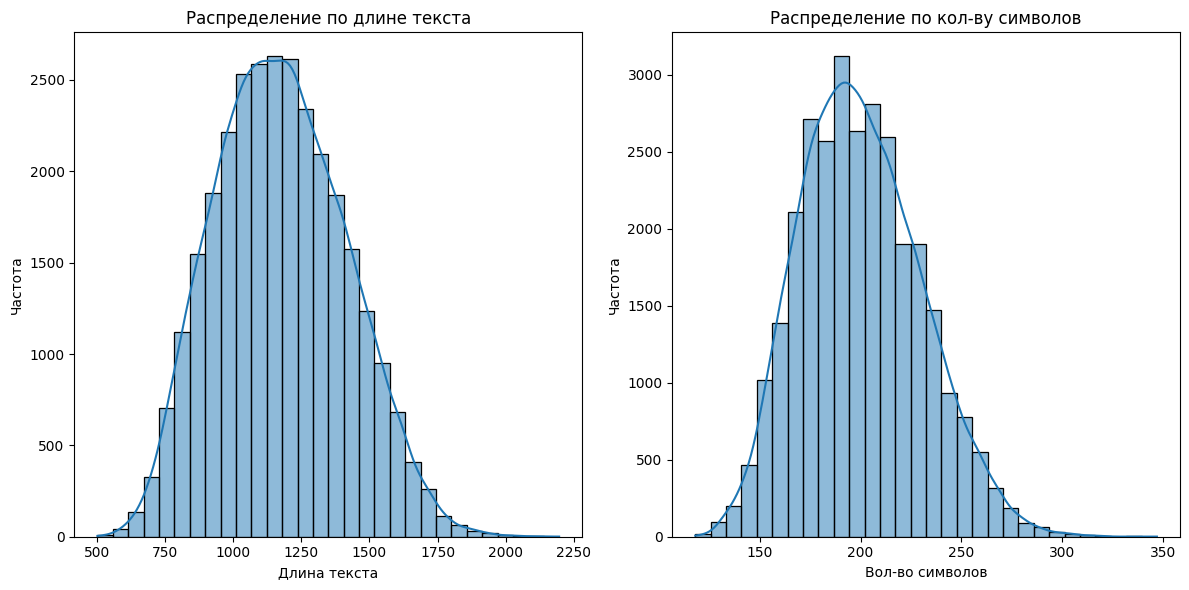

In [33]:
df['text_length'] = df['combined_captions'].apply(len)
df['word_count'] = df['combined_captions'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Распределение по длине текста')
plt.xlabel('Длина текста')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Распределение по кол-ву символов')
plt.xlabel('Вол-во символов')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

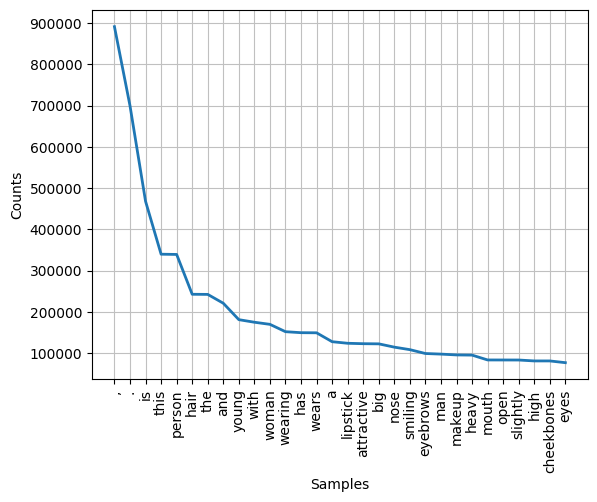

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
all_words = ' '.join(df['combined_captions']).lower()
tokens = word_tokenize(all_words)

fdist = FreqDist(tokens)

fdist.plot(30, cumulative=False)

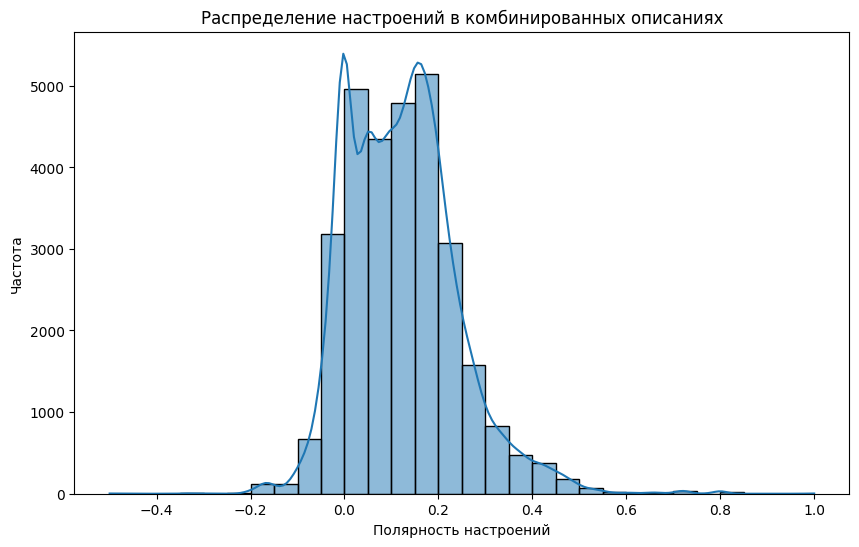

In [35]:
from textblob import TextBlob

df['sentiment'] = df['combined_captions'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Распределение настроений в комбинированных описаниях')
plt.xlabel('Полярность настроений')
plt.ylabel('Частота')
plt.show()

In [1]:
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anno_path = '/home/chaichuk/Main_Project/Python/CelebAMask-HQ/CelebAMask-HQ-attribute-anno.txt'

with open(anno_path, 'r') as f:
    lines = f.readlines()
    num_images = int(lines[0])
    attributes = lines[1].split()
    # Store the attributes for each image in a dictionary
    image_attributes = []
    for i in range(num_images):
        image_id, *attr_values = lines[i+2].split()
        for j in range(len(attr_values)):
            attr_values[j] = 1 if attr_values[j] == '1' else 0
        image_attributes.append(dict(zip(attributes, attr_values)))
attributes_count = Counter()
for i in range(len(image_attributes)):
    attributes_count.update(image_attributes[i])
attributes_dict = dict(attributes_count)

In [3]:
face_attributes = ['Arched_Eyebrows', 'Bags_Under_Eyes', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair',
               'Blond_Hair', 'Brown_Hair', 'Bushy_Eyebrows', 'Double_Chin', 'Goatee', 'Gray_Hair', 'Straight_Hair',
               'Sideburns', 'Rosy_Cheeks', 'Receding_Hairline', 'Pointy_Nose', 'Pale_Skin', 'Oval_Face', 'Narrow_Eyes', 'Attractive', 'Bald', 'Chubby', 'Young', 'Smiling']
accesories = ['Eyeglasses', 'Wearing_Necktie', 'Wearing_Necklace', 'Wearing_Lipstick', 'Wearing_Hat', 'Wearing_Earrings', 'Heavy_Makeup']

In [4]:
df = pd.DataFrame()
df['attribute'] = attributes_dict.keys()
df['count'] = attributes_dict.values()
df = df.sort_values(by=['count'], ascending=False).reset_index(drop=True)
df

,attribute,count
0,No_Beard,24328
1,Young,23368
2,Attractive,17218
3,Wearing_Lipstick,16859
4,Mouth_Slightly_Open,14139
5,Smiling,14092
6,High_Cheekbones,13847
7,Heavy_Makeup,13708
8,Male,11057
9,Arched_Eyebrows,11020


Посмотрим внимательнее на распределение различных атрибутов в наших текстах (и, соотвественно, изображениях)

In [13]:
df_face = df[df['attribute'].isin(face_attributes)]
df_accesories = df[df['attribute'].isin(accesories)]

Для начала посмотрим на гендерное распределение в данных

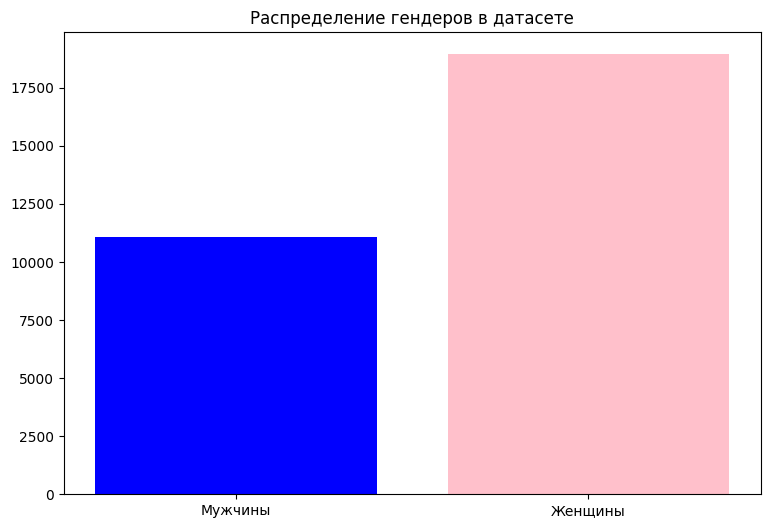

In [19]:
gender = {'Male': 11057, 'Female': 30000 - 11057}

fig, ax = plt.subplots(figsize=(9, 6))

ax.bar(gender.keys(), gender.values(), color=['blue', 'pink'])
ax.set_title('Распределение гендеров в датасете')
ax.set_xticks([0, 1], ['Мужчины', 'Женщины'])
plt.show()

Можно увидеть, что женщин значительно больше

Теперь посмотрим на встречаемость разных характеристик внешности, таких как возраст, черты лица, цвет волос и т.п.

In [23]:
ru_labels = ["Молодой",
 "Привлекательный",
"Улыбающийся",
 "Изогнутые брови",
"Большие губы",
"Большой нос",
"Заостренный нос",
"Мешки под глазами",
"Каштановые волосы",
"Черные волосы",
"Прямые волосы",
"Овальное лицо",
"Густые брови",
"Челка",
"Светлые волосы",
"Узкие глаза",
"Розовые щеки",
"Залысины",
"Бакенбарды",
"Козлиная бородка",
"Круглолицый",
"Двойной подбородок",
"Бледная кожа",
"Седые волосы",
"Лысый"]

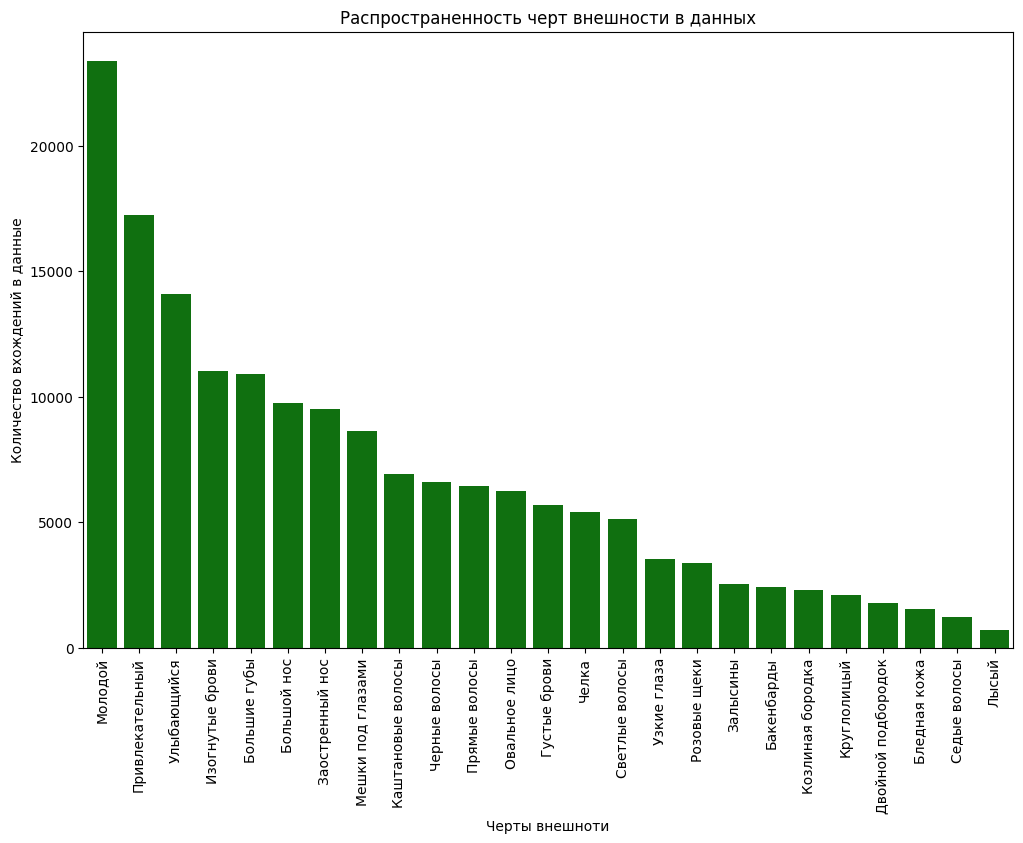

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(df_face, x='attribute', y='count', ax=ax, color='green')
ax.set_xticks(range(df_face.shape[0]), labels=ru_labels ,rotation=90)
ax.set_title('Распространенность черт внешности в данных')
ax.set_xlabel('Черты внешноти')
ax.set_ylabel('Количество вхождений в данные')
plt.show()

Также посмотрим, какие в датасете встречаются аксессуары (макияж, украшения и т.д.)

In [35]:
accesories_ru_labels = ["Помада для губ",
"Плотный макияж",
"Серьги",
"Ожерелье",
"Галстук",
"Очки",
"Шляпа"]

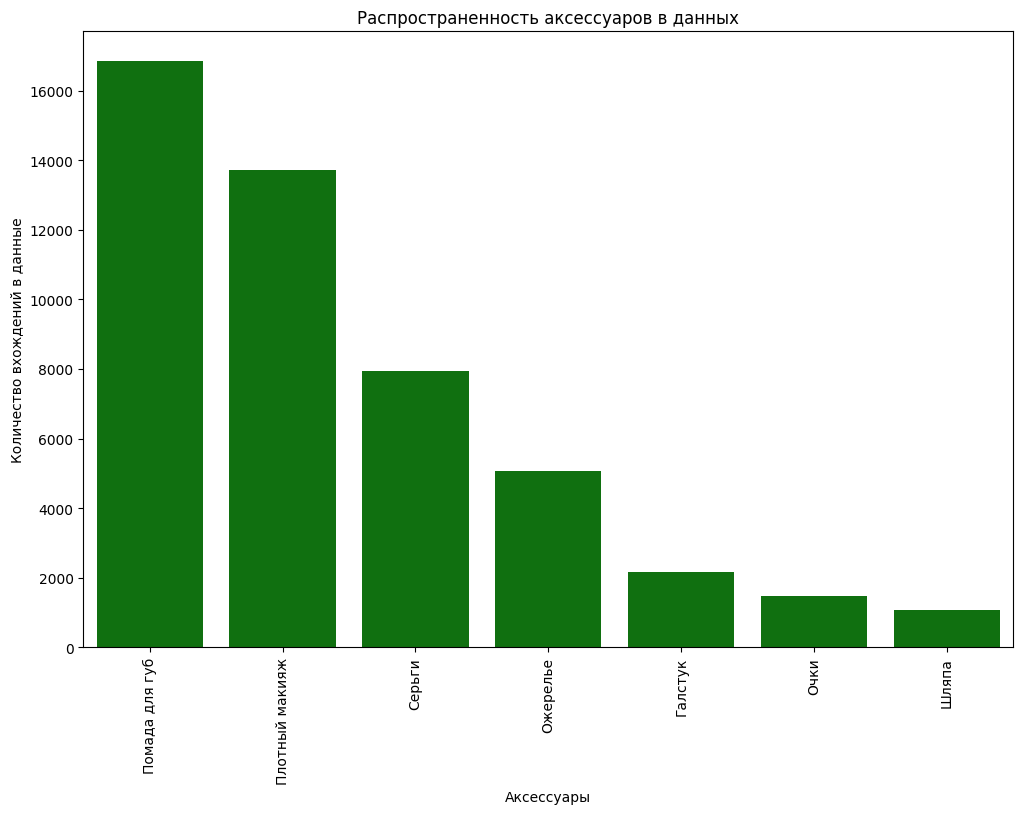

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(df_accesories, x='attribute', y='count', ax=ax, color='green')
ax.set_xticks(range(df_accesories.shape[0]), labels=accesories_ru_labels ,rotation=90)
ax.set_title('Распространенность аксессуаров в данных')
ax.set_xlabel('Аксессуары')
ax.set_ylabel('Количество вхождений в данные')
plt.show()